In this notebook, we generate the transmission as a function of incident angle of frequency, which reveals the band structure.

The PhCs will all have same geometric parameters: circular through holes in dielectric slab, arranged in sqare lattice.

Everything is in normalized units: length in units of a (period), frequency in c/a.

In [ ]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

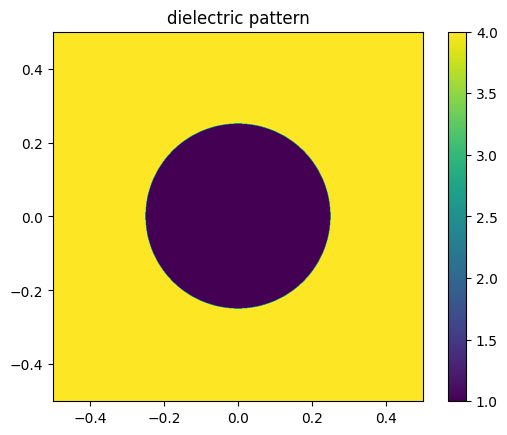

In [11]:
### some params
DEG = np.pi/180
Ny=Nx=1000 ### resolution for dielectric pattern
eps = np.ones([Ny,Nx])*4 ### uniform dielectric slab
radius = 0.25
thickness = 0.2
xs,ys = np.linspace(-0.5,0.5,Nx), np.linspace(-0.5,0.5,Ny)
xs,ys = np.meshgrid(xs,ys)
eps[xs**2 + ys**2 < radius**2] = 1 ### air holes in dielectric slab
plt.imshow(eps,extent=[-0.5,0.5,-0.5,0.5]); plt.colorbar(); plt.title('dielectric pattern'); plt.show()
### size of truncation of reciprocal lattice:
ind = 1
NM = (2*ind+1)**2
NMNM = NM**2
### frequencies to scan through:
freqs = np.linspace(0.7,0.84,141)
twists = np.linspace(0,45,46) * DEG
kxs = np.linspace(0,0.5,51) ### in 2π/a units

## Twisted bilayer

In [4]:
obj2 = rcwa([eps,eps], [thickness,thickness], [1,2],twist=1e-4, N=ind, M=ind, verbose=0)
obj2.set_freq_k(freqs[0], (0, 0))
(r,t), (reflected,transmitted) = obj2.get_RT(0,1, storing_intermediate_Smats=True)

In [5]:
print('total reflection and transmittion:\n',r,t)
print('each polarization component of 0th-order reflection and transmittion:\n',reflected,transmitted)

total reflection and transmittion:
 0.022103168621005455 0.977896831378997
each polarization component of 0th-order reflection and transmittion:
 [-1.48760253e-02-5.40750257e-02j -4.65335146e-20-1.59626957e-16j
  0.00000000e+00+0.00000000e+00j] [-9.83280507e-01+5.59317347e-02j -2.94936647e-06-2.76800419e-06j
  0.00000000e+00+0.00000000e+00j]


### vary kx
This corresponds to the band structure in typical photonic crystal texts. Here since there is no strict periodicity, how band structure is defined may be ambiguous, but the band folding picture is still valid to explain the observed transmission dips.

In [12]:
trans = []
twist = 1*DEG
for kx in tqdm(kxs):
    for freq in freqs:
        obj2 = rcwa([eps,eps], [thickness,thickness], [1,2],twist=twist, N=ind, M=ind, verbose=0)
        obj2.set_freq_k(freq, (kx, 0))
        (r,t), (reflected,transmitted) = obj2.get_RT(0,1)
        trans.append(t)
trans = np.array(trans).reshape(len(kxs),len(freqs))

100%|██████████| 51/51 [13:05<00:00, 15.40s/it]


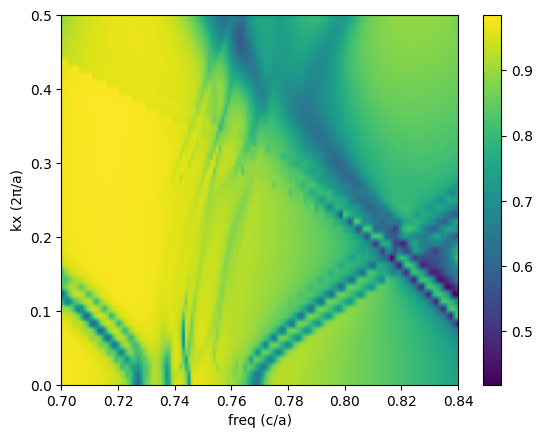

In [15]:
plt.imshow(trans,extent=[freqs[0],freqs[-1],kxs[0], kxs[-1]],aspect='auto',origin='lower')
plt.xlabel('freq (c/a)')
plt.ylabel('kx (2π/a)')
plt.colorbar()
plt.show()

### vary twist
Transmission as a function of twist angle and frequency shows rich twist-dependent resonant behavior

In [ ]:
trans = []
for twist in tqdm(twists):
    for freq in freqs:
        obj2 = rcwa([eps,eps], [thickness,thickness], [1,2],twist=twist, N=ind, M=ind, verbose=0)
        obj2.set_freq_k(freq, (0, 0))
        (r,t), (reflected,transmitted) = obj2.get_RT(0,1)
        trans.append(t)
trans = np.array(trans).reshape(len(twists),len(freqs))

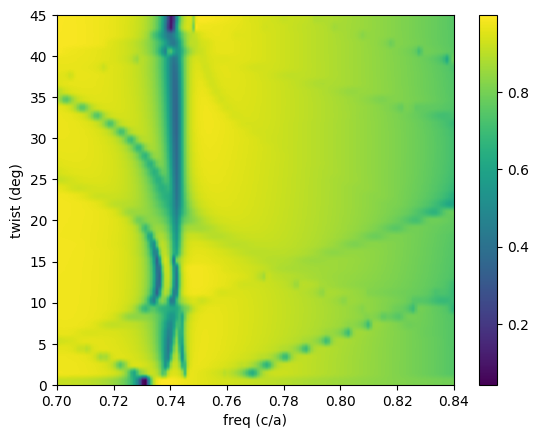

In [72]:
plt.imshow(trans,extent=[freqs[0],freqs[-1],twists[0]/DEG, twists[-1]/DEG],aspect='auto',origin='lower')
plt.xlabel('freq (c/a)')
plt.ylabel('twist (deg)')
plt.colorbar()
plt.show()

Note the discontinuity at twist=0. Our code here uses extended bases only if the twist angle is nonzero.

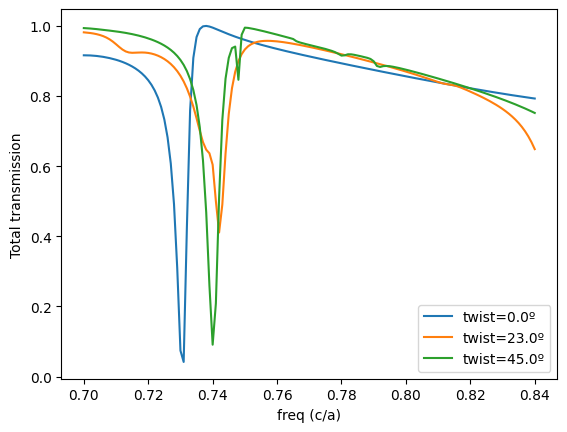

In [75]:
for twisti in [0,23,45]:
    plt.plot(freqs,trans[twisti,:],label=f'twist={twists[twisti]/DEG:.1f}º')
plt.xlabel('freq (c/a)'); plt.ylabel('Total transmission'); plt.legend()
plt.show()